<a href="https://colab.research.google.com/github/Mahi2399/Breast_Cancer_Diagnostic.ipynb/blob/main/Breast_Cancer_Diagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("data.csv")
print("Shape:", data.shape)
print("Missing values:\n", data.isna().sum())
print("Class distribution:\n", data['diagnosis'].value_counts())

Shape: (569, 33)
Missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fract

# Descriptive **Analysis**

In [3]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

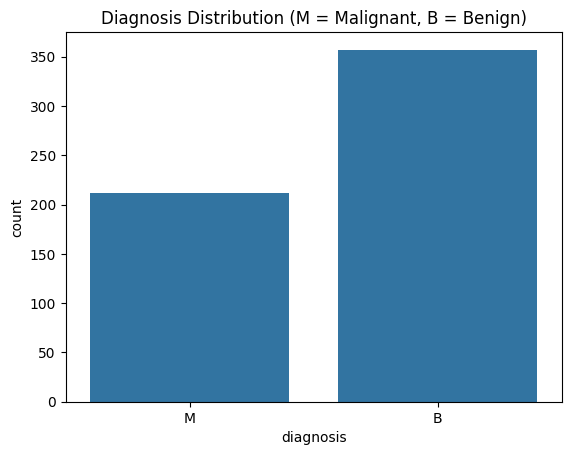

In [4]:
sns.countplot(x='diagnosis', data=data)
plt.title("Diagnosis Distribution (M = Malignant, B = Benign)")
plt.show()

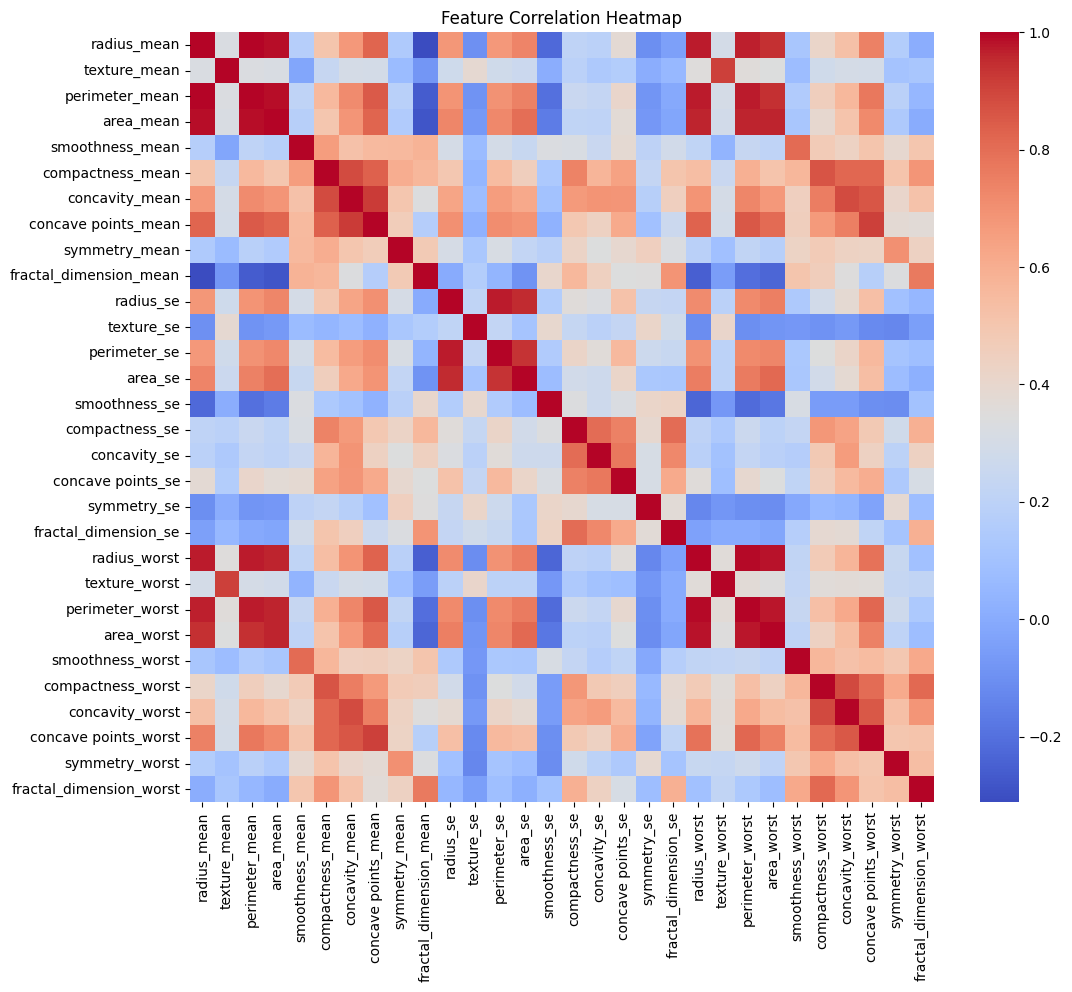

In [5]:
plt.figure(figsize=(12,10))
# Drop non-numeric columns before calculating correlation
data_numeric = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
sns.heatmap(data_numeric.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Feature Engineering (Preprocessing)**

In [6]:
# Drop irrelevant columns (id and unnamed column)
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Encode target variable: M -> 1, B -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Feature scaling (StandardScaler normalizes data to mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} rows, Testing set size: {X_test.shape[0]} rows")


Training set size: 455 rows, Testing set size: 114 rows


# **Train/Test Split**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 455
Testing samples: 114


# **Model Running**

# **1. Logistic Regression**

In [8]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9649122807017544
[[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **2. Random Forest**

In [9]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9649122807017544
[[72  0]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# **3. Support Vector Machine**

In [10]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVM Accuracy: 0.9736842105263158
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# **4. K-Nearest Neighbors**

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9473684210526315
[[71  1]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## **5.Support Vector Machine (SVM)**

In [12]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9736842105263158
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# **6. Naive Bayes**

In [13]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9210526315789473
[[69  3]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# **7. Decision Tree**

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9298245614035088
[[68  4]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



# **8. XGBoost**

In [15]:
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9649122807017544
[[72  0]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Hyperparameter Optimization**

# **Random Forest Hyperparameter Tuning**

In [16]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
print("Random Forest Optimized Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print(confusion_matrix(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Optimized Accuracy: 0.9736842105263158
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# **XGBoost Hyperparameter Tuning**

In [17]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0],
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)
print("XGBoost Optimized Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print(confusion_matrix(y_test, y_pred_xgb_best))
print(classification_report(y_test, y_pred_xgb_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Optimized Accuracy: 0.9736842105263158
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# **Performance Comparison (ROC Curves)**

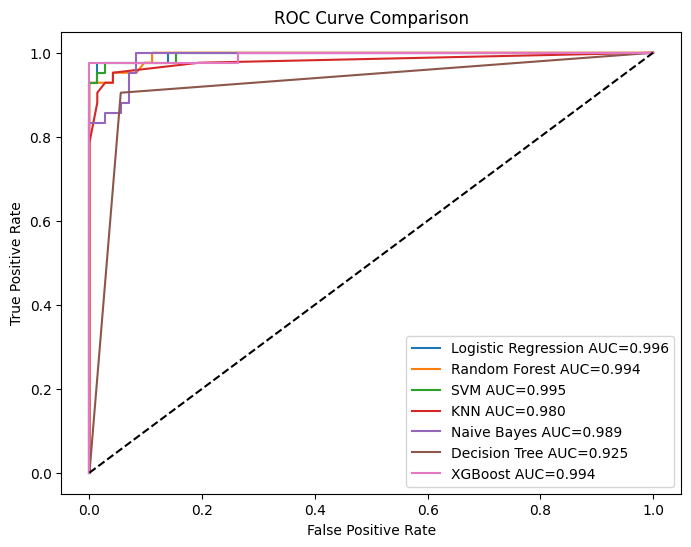

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the models dictionary to loop through
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "XGBoost": xgb_model
}

# Plotting ROC Curve for each model
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Predict probabilities for the positive class (index 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, label=f"{name} AUC={auc:.3f}")

# Plot diagonal line for no-skill classifier
plt.plot([0, 1], [0, 1], 'k--')

# Adding labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# **Result Interpretation**

In [19]:
# Store results in a list
results = []

# Loop through each model to calculate the necessary metrics
from sklearn.metrics import precision_score, recall_score, f1_score

for name, model in models.items():
    # Predict the labels and probabilities
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision
    prec = precision_score(y_test, y_pred)

    # Recall
    rec = recall_score(y_test, y_pred)

    # F1-Score
    f1 = f1_score(y_test, y_pred)

    # AUC
    auc = roc_auc_score(y_test, y_pred_prob)

    # Append the results for this model
    results.append([name, acc, prec, rec, f1, auc])

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Set the model names as index
results_df.set_index("Model", inplace=True)

# Display the results
print(results_df)

                     Accuracy  Precision    Recall  F1 Score       AUC
Model                                                                 
Logistic Regression  0.964912   0.975000  0.928571  0.951220  0.996032
Random Forest        0.964912   1.000000  0.904762  0.950000  0.994213
SVM                  0.973684   1.000000  0.928571  0.962963  0.995370
KNN                  0.947368   0.973684  0.880952  0.925000  0.980489
Naive Bayes          0.921053   0.923077  0.857143  0.888889  0.989087
Decision Tree        0.929825   0.904762  0.904762  0.904762  0.924603
XGBoost              0.964912   1.000000  0.904762  0.950000  0.993717
